In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import os

In [3]:
data_dir='/Users/johnny/data/crisis/ecuador_earthquake_2016/'

In [42]:
path = os.path.join(data_dir, 'tweets.csv')
ds = pd.read_csv(path)
ds.shape

(152269, 44)

## how many tweets by language

In [5]:
ds.groupby('lang').size().sort_values(ascending=False).head()

lang
es     93405
en     38533
und     9705
pt      3577
it      2124
dtype: int64

## how many users by language

In [11]:
ds.groupby(['lang']).agg({'screen_name': 'nunique'}).sort_values(by='screen_name', ascending=False).head()

,screen_name
lang,
es,50758
en,25880
und,7172
pt,2687
it,1172


In [12]:
ds.screen_name.nunique()

87025

## conversations stats

In [48]:
path = os.path.join(data_dir, 'es', 'conversations.csv')
conv = pd.read_csv(path, parse_dates=['timestamp'])
conv = conv[conv.num_replies>1]
conv_roots = conv[conv.in_reply_to_status_id.isnull()]
conv_roots_es=conv_roots
print(f'num conversations:{conv_roots.shape[0]}' )
print(f'num tweets:{conv[conv.conversation_id.isin(conv_roots.conversation_id)].shape[0]}' )
print(f'average replies: {conv_roots.num_replies.mean()}')
print(f'median replies: {conv_roots.num_replies.median()}')
print(f'average users: {conv_roots.num_users.mean()}')
print(f'median users: {conv_roots.num_users.median()}')

num conversations:4632
num tweets:55379
average replies: 11.955742659758204
median replies: 3.0
average users: 8.342832469775475
median users: 2.0


In [49]:
path = os.path.join(data_dir, 'en', 'conversations.csv')
conv = pd.read_csv(path, parse_dates=['timestamp'])
conv = conv[conv.num_replies>1]
conv_roots = conv[conv.in_reply_to_status_id.isnull()]
conv_roots_en=conv_roots
print(f'num conversations:{conv_roots.shape[0]}' )
print(f'num tweets:{conv[conv.conversation_id.isin(conv_roots.conversation_id)].shape[0]}' )
print(f'average replies: {conv_roots.num_replies.mean()}')
print(f'median replies: {conv_roots.num_replies.median()}')
print(f'average users: {conv_roots.num_users.mean()}')
print(f'median users: {conv_roots.num_users.median()}')

num conversations:1092
num tweets:19081
average replies: 17.473443223443223
median replies: 3.0
average users: 13.652014652014651
median users: 2.0


In [50]:
path = os.path.join(data_dir, 'other', 'conversations.csv')
conv = pd.read_csv(path, parse_dates=['timestamp'])
conv = conv[conv.num_replies>1]
conv_roots = conv[conv.in_reply_to_status_id.isnull()]
conv_roots_o=conv_roots
print(f'num conversations:{conv_roots.shape[0]}' )
print(f'num tweets:{conv[conv.conversation_id.isin(conv_roots.conversation_id)].shape[0]}' )
print(f'average replies: {conv_roots.num_replies.mean()}')
print(f'median replies: {conv_roots.num_replies.median()}')
print(f'average users: {conv_roots.num_users.mean()}')
print(f'median users: {conv_roots.num_users.median()}')

num conversations:377
num tweets:9883
average replies: 26.214854111405835
median replies: 3.0
average users: 16.358090185676392
median users: 2.0


In [59]:
conv_roots.sort_values('num_replies',ascending=False).head()

,id,screen_name,latitude,longitude,lang,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,num_replies,num_users,url
4164,318170395511492608,RuanoFaxas,NaN,NaN,und,NaN,IMAGOLOGÍA DEL DEPORTE-IMAGOLOGY OF SPORT-ИМАГ...,2013-03-31 01:18:28,318170395511492608,1,840,14,https://www.twitter.com/RuanoFaxas/status/3181...
926,721656846164107264,GiraffaCecilia,NaN,NaN,it,NaN,@pinobuon CiaoCaroGiuseppeTtOk?TerremotoT'haCr...,2016-04-17 11:09:34,721656846164107264,1,531,8,https://www.twitter.com/GiraffaCecilia/status/...
396,1034085779666948097,pinkstroberi,NaN,NaN,in,NaN,"Kemarin ngatain ""Y0uNgL3x GobLoK"" ""oTAk sELa...",2018-08-27 14:30:36,1034085779666948097,1,442,248,https://www.twitter.com/pinkstroberi/status/10...
2654,714142037143134209,JuanakinJMS,NaN,NaN,und,NaN,NUEVO LOCKE!!! POKÉMON ORO HARDLOCKE!!!!! http...,2016-03-27 17:28:24,714142037143134209,1,435,37,https://www.twitter.com/JuanakinJMS/status/714...
6903,925842593153417216,mangelrogel,NaN,NaN,is,NaN,Top 10 de mis youtubers favoritos: -vegetta -v...,2017-11-01 21:50:50,925842593153417216,1,394,318,https://www.twitter.com/mangelrogel/status/925...


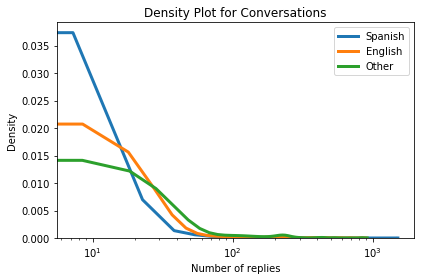

In [60]:

# Draw the density plot
sns.distplot(conv_roots_es['num_replies'], hist = False, kde = True,
             kde_kws = {'linewidth': 3},
             label = 'Spanish')
sns.distplot(conv_roots_en['num_replies'], hist = False, kde = True,
             kde_kws = {'linewidth': 3},
             label = 'English')
sns.distplot(conv_roots_o['num_replies'], hist = False, kde = True,
             kde_kws = {'linewidth': 3},
             label = 'Other')
    
# Plot formatting
#plt.legend(prop={'size': 16}, title = 'Airline')
plt.xscale('log')
#plt.yscale('log')
plt.title('Density Plot for Conversations')
plt.xlabel('Number of replies')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('../results/conv_dist.eps', format='eps')

In [63]:
path = os.path.join(data_dir, 'conversations.csv')
print(path)
conv = pd.read_csv(path, parse_dates=['timestamp'])
conv = conv[conv.num_replies>1]
conv_roots = conv[conv.in_reply_to_status_id.isnull()]
print(f'num conversations:{conv_roots.shape[0]}' )
print(f'num tweets:{conv[conv.conversation_id.isin(conv_roots.conversation_id)].shape[0]}' )
print(f'average replies: {conv_roots.num_replies.mean()}')
print(f'median replies: {conv_roots.num_replies.median()}')
print(f'average users: {conv_roots.num_users.mean()}')
print(f'median users: {conv_roots.num_users.median()}')

/Users/johnny/data/crisis/ecuador_earthquake_2016/conversations.csv
num conversations:6101
num tweets:84343
average replies: 13.82445500737584
median replies: 3.0
average users: 9.788395345025405
median users: 2.0


In [72]:
np.percentile(conv_roots.num_replies, 84)

10.0

## dialogs stats

In [61]:
path = os.path.join(data_dir, 'es', 'dialogs.csv')
dialogs = pd.read_csv(path, parse_dates=['timestamp'])
print(f'number of tweets {dialogs.id.nunique()}')
print(f'number of conversations {dialogs.dialog_id.nunique()}')

number of tweets 6119
number of conversations 1415


In [62]:
path = os.path.join(data_dir, 'en', 'dialogs.csv')
dialogs = pd.read_csv(path, parse_dates=['timestamp'])
print(f'number of tweets {dialogs.id.nunique()}')
print(f'number of conversations {dialogs.dialog_id.nunique()}')

number of tweets 3874
number of conversations 1243


## dialogs sample stats

In [8]:
path = os.path.join(data_dir, 'es', 'dialogs_sample.csv')
dialogs = pd.read_csv(path, parse_dates=['timestamp'])
print(f'number of rows {dialogs.shape[0]}')
print(f'number of tweets {dialogs.id.nunique()}')
print(f'number of conversations {dialogs.dialog_id.nunique()}')

number of rows 3572
number of tweets 2193
number of conversations 518


In [19]:
path = os.path.join(data_dir, 'en', 'dialogs_sample.csv')
dialogs = pd.read_csv(path, parse_dates=['timestamp'])
print(f'number of rows {dialogs.shape[0]}')
print(f'number of tweets {dialogs.id.nunique()}')
print(f'number of conversations {dialogs.dialog_id.nunique()}')

number of rows 1159
number of tweets 730
number of conversations 172


## tweets annotated

In [234]:
path = os.path.join(data_dir,  '2016_ecuador_eq_es.csv')
tweets = pd.read_csv(path, parse_dates=['timestamp'])
print(tweets.shape)
print(tweets.choose_one_category.value_counts())
print(tweets.crisis_related.value_counts())

(4168, 10)
not_related_or_irrelevant                            1846
other_useful_information                              753
injured_or_dead_people                                624
sympathy_and_emotional_support                        451
donation_needs_or_offers_or_volunteering_services     234
infrastructure_and_utilities_damage                   157
caution_and_advice                                     61
missing_trapped_or_found_people                        30
displaced_people_and_evacuations                       12
Name: choose_one_category, dtype: int64
yes    2322
no     1846
Name: crisis_related, dtype: int64


In [235]:
path = os.path.join(data_dir,  '2016_ecuador_eq_en.csv')
tweets = pd.read_csv(path, parse_dates=['timestamp'])
print(tweets.shape)
tweets.choose_one_category.value_counts()
print(tweets.crisis_related.value_counts())

(4192, 10)
yes    2246
no     1946
Name: crisis_related, dtype: int64


In [236]:
4168+4192

8360

## conversational analysis


In [103]:
path = os.path.join(data_dir, 'en', 'conversations.csv')
conv = pd.read_csv(path, parse_dates=['timestamp'])
path = os.path.join(data_dir,  '2016_ecuador_eq_en.csv')
tweets = pd.read_csv(path, parse_dates=['timestamp'])


In [104]:
conv=conv.merge(tweets[['id','choose_one_category']], on='id', how='inner')
conv.shape

(2112, 14)

In [105]:
conv_root=conv[(conv.num_replies> 1)&(conv.in_reply_to_status_id.isnull())]
conv_root.shape

(89, 14)

In [106]:
tmp=conv_root.groupby('choose_one_category').size().reset_index() 
tmp.columns = ['choose_one_category','count']
tmp['perc'] = tmp['count'] / tmp['count'].sum()
tmp

,choose_one_category,count,perc
0,caution_and_advice,3,0.033708
1,donation_needs_or_offers_or_volunteering_services,4,0.044944
2,infrastructure_and_utilities_damage,4,0.044944
3,injured_or_dead_people,23,0.258427
4,missing_trapped_or_found_people,1,0.011236
5,not_related_or_irrelevant,18,0.202247
6,other_useful_information,24,0.269663
7,sympathy_and_emotional_support,12,0.134831


In [107]:
ix=conv_root[conv_root.choose_one_category=='not_related_or_irrelevant'].conversation_id
tmp=conv[conv.conversation_id.isin(ix)].groupby('choose_one_category').size().reset_index()
tmp.columns = ['choose_one_category','count']
tmp['perc'] = tmp['count'] / tmp['count'].sum()
tmp

,choose_one_category,count,perc
0,infrastructure_and_utilities_damage,1,0.006711
1,not_related_or_irrelevant,144,0.966443
2,other_useful_information,2,0.013423
3,sympathy_and_emotional_support,2,0.013423


In [108]:
ix=conv_root[conv_root.choose_one_category!='not_related_or_irrelevant'].conversation_id
tmp=conv[conv.conversation_id.isin(ix)].groupby('choose_one_category').size().reset_index()
tmp.columns = ['choose_one_category','count']
tmp['perc'] = tmp['count'] / tmp['count'].sum()
tmp

,choose_one_category,count,perc
0,caution_and_advice,3,0.014218
1,donation_needs_or_offers_or_volunteering_services,25,0.118483
2,infrastructure_and_utilities_damage,6,0.028436
3,injured_or_dead_people,25,0.118483
4,missing_trapped_or_found_people,1,0.004739
5,not_related_or_irrelevant,74,0.350711
6,other_useful_information,44,0.208531
7,sympathy_and_emotional_support,33,0.156398


## temporal analysis of locals vs foreigners

In [230]:
path = os.path.join(data_dir, 'es', 'conversations.csv')
conv = pd.read_csv(path, parse_dates=['timestamp'])
path = os.path.join(data_dir,  '2016_ecuador_eq_es.csv')
tweets = pd.read_csv(path, parse_dates=['timestamp'])

In [231]:
from datetime import datetime

In [232]:
tweets=tweets[tweets.timestamp>= datetime(2016,4,16)]
tweets=tweets[tweets.timestamp<= datetime(2016,4,20)]
tweets=tweets[tweets.choose_one_category!='not_related_or_irrelevant']
tweets=tweets.groupby([tweets['timestamp'].dt.date,tweets['timestamp'].dt.hour, 'choose_one_category']).size().reset_index()
#tweets.columns = ['timestamp','choose_one_category','num']
tweets
#tweets_es = tweets
#tweets.groupby([tweets['timestamp'].dt.date]).size().plot()


ValueError: cannot insert timestamp, already exists

In [202]:
path = os.path.join(data_dir, 'en', 'conversations.csv')
conv = pd.read_csv(path, parse_dates=['timestamp'])
path = os.path.join(data_dir,  '2016_ecuador_eq_en.csv')
tweets = pd.read_csv(path, parse_dates=['timestamp'])

In [203]:
tweets=tweets[tweets.timestamp>= datetime(2016,4,16)]
tweets=tweets[tweets.timestamp<= datetime(2016,4,20)]
tweets=tweets[tweets.choose_one_category!='not_related_or_irrelevant']
#tweets.groupby([tweets['timestamp'].dt.date, 'choose_one_category']).size().plot()
tweets_en = tweets

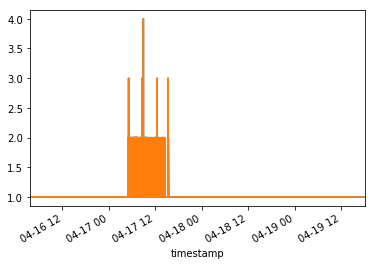

In [204]:
#tweets.groupby([tweets['timestamp'].dt.date, 'choose_one_category']).size()#.plot()
#fig, ax = plt.subplots()

ax = tweets_en.groupby([tweets_en['timestamp']]).size().plot()
#ax.plot(range(len(en)), en)
tweets_es.groupby([tweets_es['timestamp']]).size().plot(ax=ax)
#ax.plot(range(len(es)), es)

In [171]:
tweets.groupby([tweets['timestamp'].dt.date, 'choose_one_category']).size()

timestamp   choose_one_category                              
2013-08-17  not_related_or_irrelevant                               1
2015-02-12  not_related_or_irrelevant                              11
2015-08-07  not_related_or_irrelevant                               1
2015-08-23  not_related_or_irrelevant                               5
2016-03-18  not_related_or_irrelevant                               1
2016-03-27  not_related_or_irrelevant                               1
2016-04-08  not_related_or_irrelevant                              26
2016-04-09  not_related_or_irrelevant                               1
2016-04-10  not_related_or_irrelevant                               3
2016-04-11  not_related_or_irrelevant                               2
2016-04-13  not_related_or_irrelevant                               5
2016-04-14  not_related_or_irrelevant                               1
            other_useful_information                                1
2016-04-15  not_related_or_i

## mixed languages in annotated tweets

In [237]:
path = os.path.join(data_dir, 'es', 'conversations.csv')
conv = pd.read_csv(path, parse_dates=['timestamp'])
path = os.path.join(data_dir,  '2016_ecuador_eq_es.csv')
tweets = pd.read_csv(path, parse_dates=['timestamp'])

In [240]:
conv_annotated = conv[conv.id.isin(tweets.id)]
conv_annotated.shape

(4168, 13)

In [243]:
conv_annotated.lang.value_counts()

es     4005
und      75
pt       39
en       22
it        6
tl        5
in        5
eu        2
de        2
et        1
no        1
fr        1
ht        1
hi        1
da        1
fi        1
Name: lang, dtype: int64

In [245]:
print(f'% of en in es tweets {conv_annotated.lang.value_counts()[0]/conv_annotated.shape[0]}')

% of en in es tweets 0.9608925143953935


In [273]:
path = os.path.join(data_dir, 'en', 'conversations.csv')
conv = pd.read_csv(path, parse_dates=['timestamp'],dtype={'id':object})
path = os.path.join(data_dir,  '2016_ecuador_eq_en.csv')
tweets = pd.read_csv(path, parse_dates=['timestamp'],dtype={'id':object})


In [274]:
conv_annotated = conv[conv.id.isin(tweets.id)]
conv_annotated.shape

(4191, 13)

In [275]:
conv_annotated.lang.value_counts()

en     3763
und     232
es       92
pt       25
in       17
hi       12
fr       11
tl        7
de        5
ht        5
sv        3
ca        2
nl        2
ru        2
no        1
et        1
is        1
pl        1
vi        1
ur        1
eu        1
ar        1
hu        1
tr        1
it        1
ro        1
fi        1
Name: lang, dtype: int64

In [276]:
print(f'% of en in es tweets {conv_annotated.lang.value_counts()[0]/conv_annotated.shape[0]}')

% of en in es tweets 0.8978764018134097
